In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from hydroeval import evaluator, nse, kge, pbias
from tqdm import tqdm
import datetime as dt
import matplotlib as mpl
from matplotlib.ticker import FormatStrFormatter
import matplotlib.colors as pltc
import geopandas
import mapclassify
import seaborn as sns

mpl.rcParams['pdf.fonttype'] = 42

In [50]:
## Data that have a value for all models and kge better than -5. ~166 gages (76 are better than -.41)

data = pd.read_csv("../data/pnwNP_modelStats_NewEps_NWM3.csv")
data = data[data.model!="nwm0"]
data = data[["gage", "model",'kge','kge_r','kge_a','kge_b']]


tmp = data.melt(id_vars=["gage", "model"], var_name="metric", value_name="value")
tmp['value']=tmp['value'].astype(float)

tmp = tmp.replace([np.inf, -np.inf], np.nan).dropna().reset_index(drop=True)
tmp_kge = tmp[tmp.metric == "kge"]

In [55]:
df = pd.read_csv("../data/pnwNP_StatsLocations_HydroClass.csv")
tt = df[["site_no","HydroLandClass","geometry"]]
hydroClass_KGE = pd.merge(tmp_kge,tt,left_on="gage",right_on="site_no").reset_index(drop=True)

## Plot pie of KGE values

In [52]:
less = len(tmp_kge[tmp_kge.value < -0.41])
greater = len(tmp_kge) - less

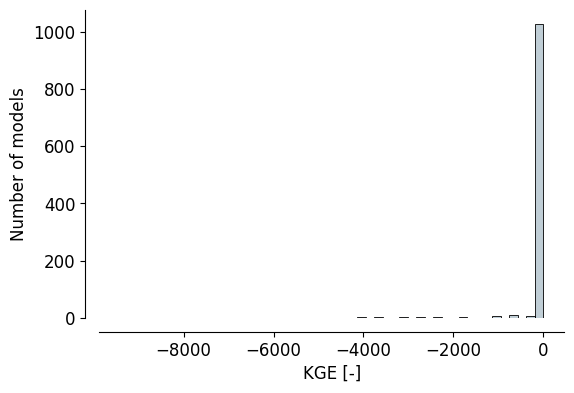

In [53]:
plt.figure(figsize=(6,4))
plt.rcParams.update({'font.size': 12})

ax = sns.histplot(tmp_kge,x = "value",
            bins = 50,
            color = "#839FAF",
            alpha = 0.5)
ax.set(ylabel="Number of models")
ax.set(xlabel="KGE [-]")

sns.despine(offset=10)

# plt.savefig('../docs/KGE_Histogram.png',dpi=600)

([<matplotlib.patches.Wedge at 0x29240287210>,
 [Text(-0.8954069421102338, -0.6389416311532696, 'KGE less than -0.41'),
  Text(0.9768076384715597, 0.697027142530056, 'KGE greater than -0.41')],
 [Text(-0.488403786605582, -0.34851361699269245, '70%'),
  Text(0.5698044557750764, 0.406599166475866, '30%')])

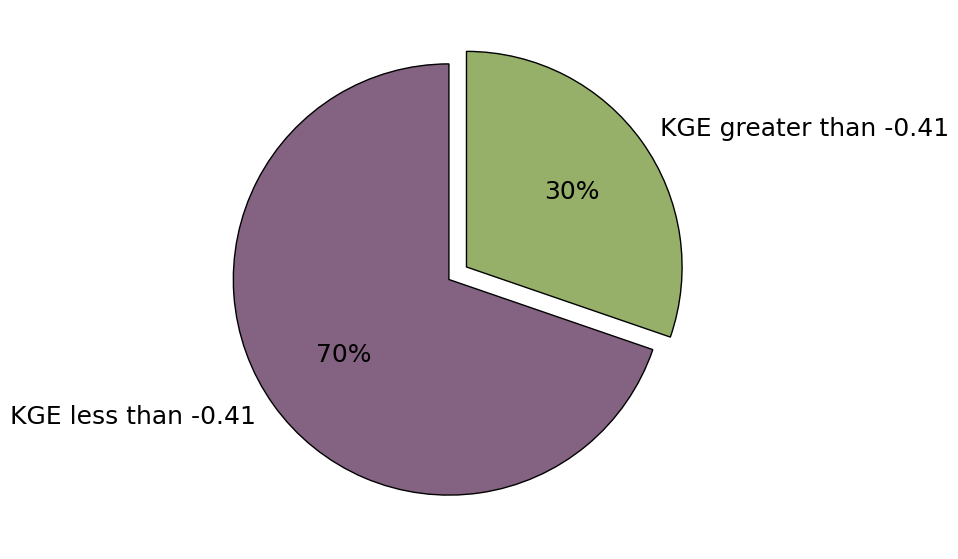

In [54]:
f,ax = plt.subplots(figsize=(10, 7))

labels = ["KGE less than -0.41","KGE greater than -0.41"]
sizes = [(less/len(tmp_kge))*100,(greater/len(tmp_kge))*100]

plt.rcParams.update({'font.size': 18})
colors = [ '#836381','#96B06A']
explode = (0, 0.1)
plt.pie(sizes,
        startangle=90, 
        colors=colors, 
        wedgeprops={'edgecolor': 'black'}, 
        autopct='%1.f%%', 
        explode=explode,
        labels = labels)

# plt.savefig('../docs/KGE_Pie.png',dpi=600)

## plot decomposition

## plot decomposition

C:\Users\adamprice\AppData\Local\Temp\ipykernel_23628\2009585946.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(["NWM3.0","NWM 2.1","PRMS","VIC"])


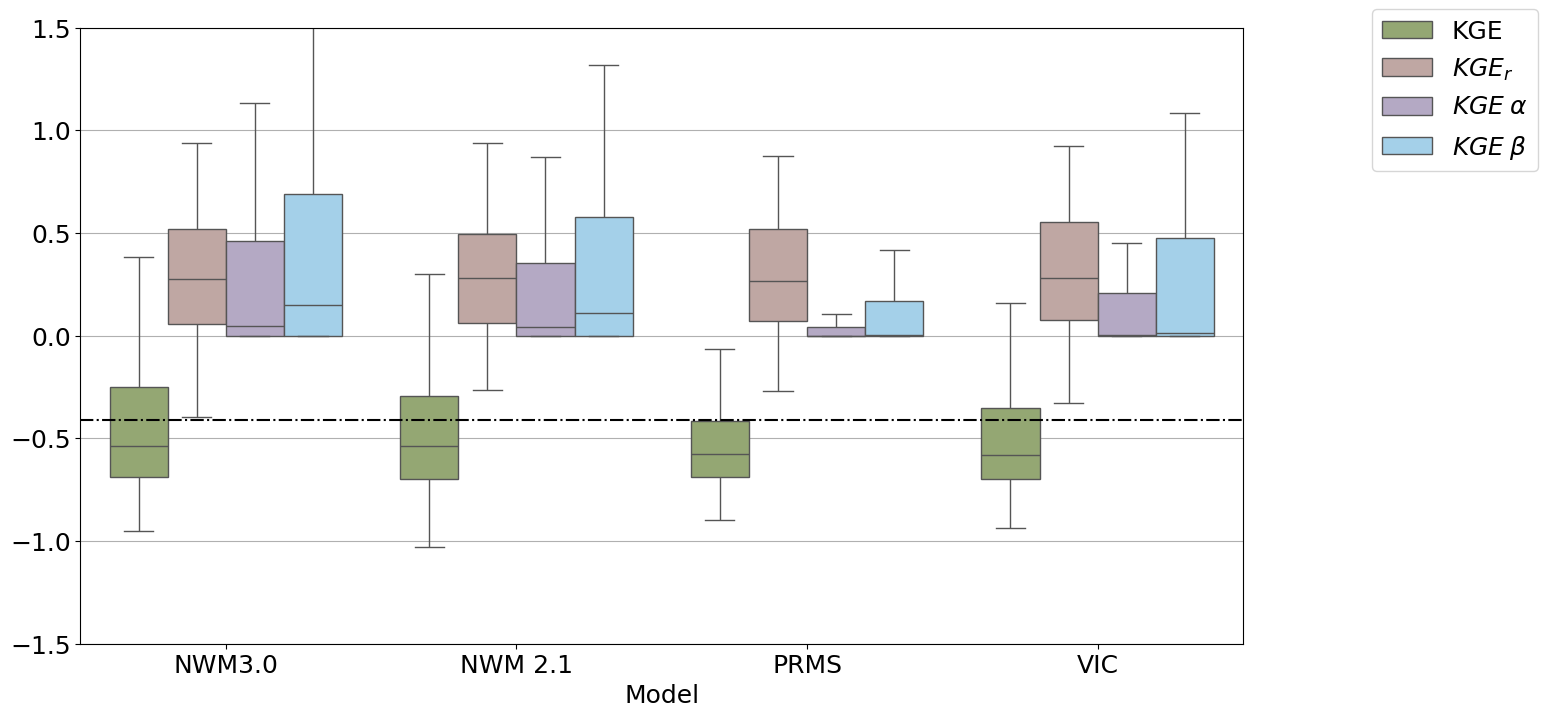

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams.update({'font.size': 18})
plt.figure(figsize=(15,8))


ax = sns.boxplot(data=tmp, 
                 x="model", 
                 y="value",
                 hue = "metric",
                 showfliers=False,       
                 palette = ["#96B06A","#C4A49E","#B3A5C8","#98D3F5"],
                 order = ["nwm3","nwm1","prms","vic"])



ax.set_ylim([-1.5,1.5])
ax.set_xticklabels(["NWM3.0","NWM 2.1","PRMS","VIC"])
ax.set(ylabel=None)
ax.set(xlabel="Model")
ax.grid('on', which='major', axis='y')
ax.axhline(y=-0.41, color='black', linestyle='-.')
hands, labs = ax.get_legend_handles_labels()
plt.legend(handles=hands, labels=["KGE",r'$KGE_r$',r'$KGE_ \alpha$',r'$KGE_ \beta$'],bbox_to_anchor=(1.1, 1.05))


# plt.savefig("../docs/KGE_decomp_boxplot_filtered.png",dpi=600)

## Plot just KGE

C:\Users\adamprice\AppData\Local\Temp\ipykernel_23628\1202444659.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(["NWM3.0","NWM 2.1","PRMS","VIC"])


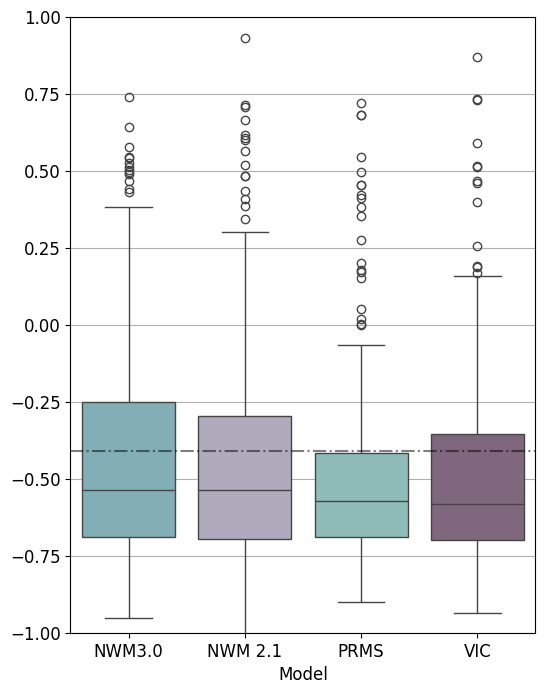

In [60]:
jj = tmp[tmp["metric"]=="kge"]

plt.rcParams.update({'font.size': 12})
plt.figure(figsize=(6,8))

pal = {'nwm3': '#79B5BD',
       'nwm1': '#AEA8BF',
       'nwm0': '#839FAF',
       'prms': '#87C4BF',
       'vic': '#836381'}


ax = sns.boxplot(data=jj, 
                 x="model", 
                 y="value",
                 hue="model",
                 palette = pal,
                order = ["nwm3","nwm1","prms","vic"])

ax.set_xticklabels(["NWM3.0","NWM 2.1","PRMS","VIC"])
ax.set_ylim([-1,1])
ax.set(ylabel=None)
ax.set(xlabel="Model")
ax.grid('on', which='major', axis='y')
ax.axhline(y=-0.41, color='black', linestyle='-.',alpha=.5)
# ax.axhline(y=0, color='black',linewidth=0.75)

# plt.savefig("../docs/KGE_boxplot_all.png",dpi=600)

## KGE < -1 out by hydroregion

C:\Users\adamprice\AppData\Local\Temp\ipykernel_23628\2587744217.py:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(["Very-wet","Wet","Moist","Dry","Semi-arid","Arid"])


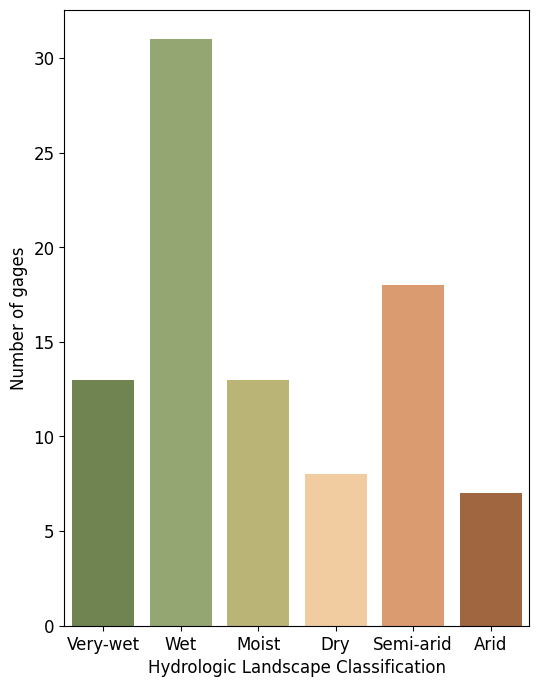

In [110]:
toPlot = hydroClass_KGE[hydroClass_KGE.value < -1].reset_index(drop=True)

plt.rcParams.update({'font.size': 12})
plt.figure(figsize=(6,8))

my_order = ["very_wet",
            "wet",
            "moist",
            "dry",
            "semi_arid",
            "arid"]

pal = {'very_wet': '#728C48',
       'wet': '#96B06A',
       'moist': '#C6BD6C',
       'dry': '#FFCD93',
       'semi_arid': '#EC975F' ,
       'arid': '#B0632F'}

ax = sns.countplot(toPlot, 
                  x='HydroLandClass',
                  hue="HydroLandClass",
                  palette = pal,
                  order = my_order)

ax.set_xticklabels(["Very-wet","Wet","Moist","Dry","Semi-arid","Arid"])
ax.set(ylabel="Number of gages")
ax.set(xlabel="Hydrologic Landscape Classification")

plt.savefig("../docs/KGEall_HydroRegion.png",dpi=600)

## Plot Map

In [68]:
pnw_hydro = geopandas.read_file("../data/mapping/pnw_hydrologic_landscape_class/PNW Hydrologic Landscape Class.shp")
pnw_hydro_repro = pnw_hydro.to_crs(epsg=4269)
pnw_hydro_repro.CLASS = pnw_hydro['CLASS'].astype(str).str[0:1]

states = geopandas.read_file("../data/mapping/cb_2018_us_state_5m/cb_2018_us_state_5m.shp")
states = states.to_crs(epsg=4269)
st = ["Idaho",'Washington','Oregon']
states = states[states["NAME"].isin(st)]

rivs = geopandas.read_file("../data/mapping/rs16my07/")
rivs = rivs.set_crs(epsg=4269)
rivs = geopandas.clip(rivs, states)
rivs = rivs[rivs["STRAHLER"]>=4]

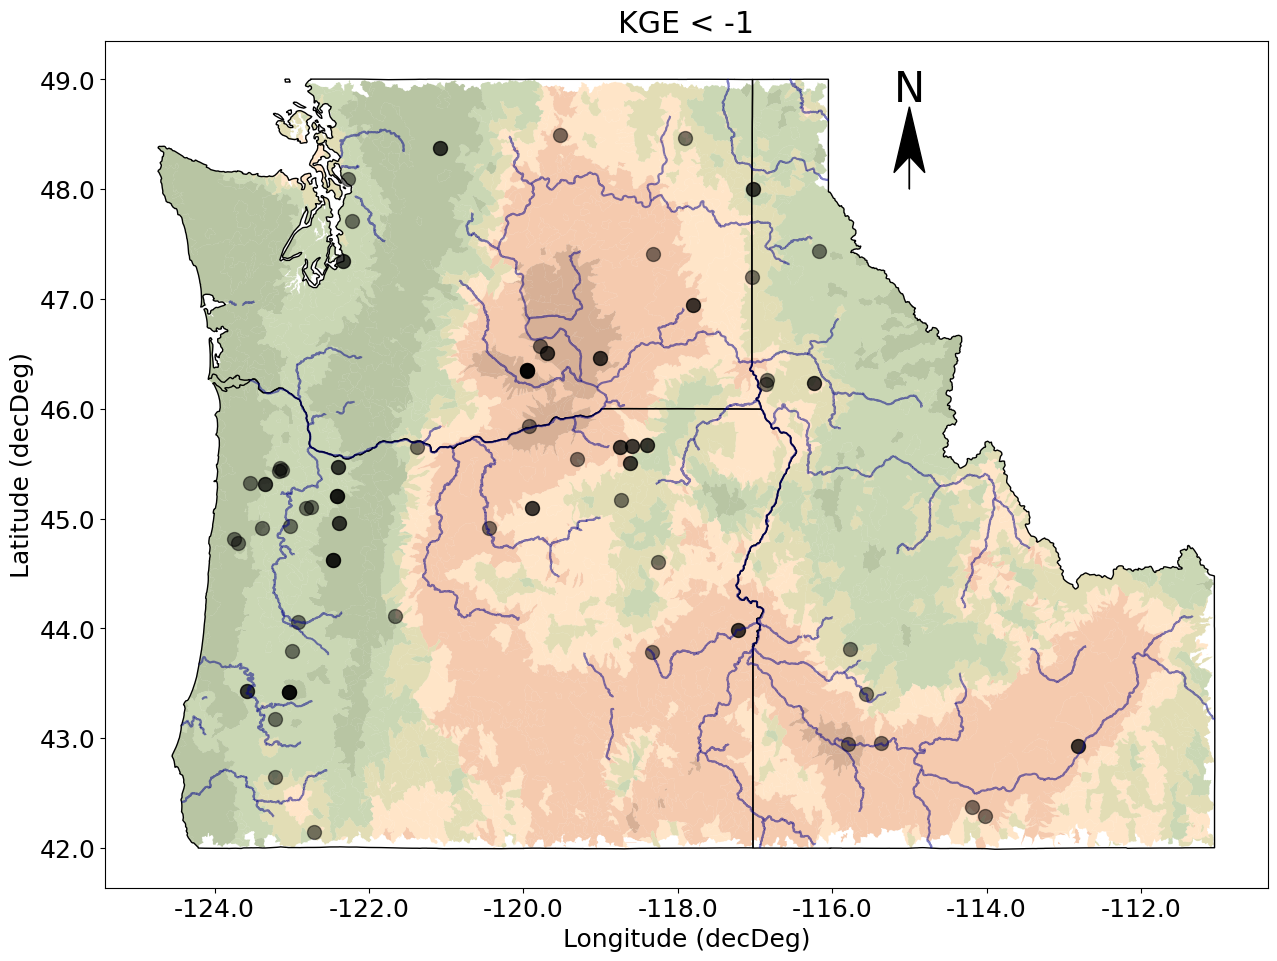

In [111]:
df = pd.read_csv("../data/pnwNP_StatsLocations_HydroClass.csv")
toPlot = pd.merge(toPlot,df,left_on="gage",right_on="site_no").reset_index(drop=True)
toPlot = geopandas.GeoDataFrame(toPlot, geometry=geopandas.points_from_xy(toPlot.dec_long_va,toPlot.dec_lat_va)).set_crs('epsg:4269')


plt.rcParams.update({'font.size': 18})
f,ax = plt.subplots(figsize=(15, 15))

pal = {'V': '#728C48',
       'W': '#96B06A',
       'M': '#C6BD6C',
       'D': '#FFCD93',
       'S': '#EC975F' ,
       'A': '#B0632F',
        'B': "#000000"}


pnw_hydro_repro.plot(ax=ax,legend=True,color = pnw_hydro_repro['CLASS'].map(pal),alpha= .5,edgecolor="none")
rivs.plot(ax=ax,
          alpha = .5,
          edgecolor='darkblue')
states.plot(ax=ax,facecolor="none",edgecolor = "black")

toPlot.plot(ax=ax,
        markersize=100,
        alpha = .5,
        edgecolor = "black",
        color = "black",
        legend=True)
                
ax.arrow(-115, 48, 0, 0.75, length_includes_head=True,
          head_width=0.4, head_length=0.6, overhang=.25, facecolor='k')
ax.text(x=-115.2, y=48.8, s='N', fontsize=30)
ax.set_xlabel("Longitude (decDeg)")
ax.set_ylabel("Latitude (decDeg)")
ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
ax.xaxis.set_major_formatter(FormatStrFormatter('%.1f'))
ax.set_title('KGE < -1')

f.savefig('../docs/KGEall_HydroRegion_map.png',dpi=600)
# f.savefig('../docs/KGEmean_HydroRegion.pdf')

### KGE vs low and no flow

<Axes: xlabel='propZero', ylabel='kge'>

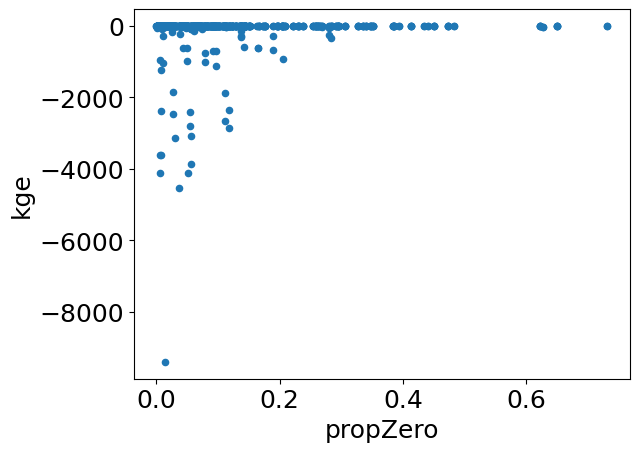

In [118]:
data.plot.scatter(x = "propZero",
         y = "kge")